<a href="https://colab.research.google.com/github/ghazalna/Pathrise-Analytics-Insights/blob/main/Pathrise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal is to predict the salary of data related positions based on location, company review and job title by using Linear Regression

# **Import dataset**

In [28]:
from google.colab import files

In [29]:
uploaded = files.upload()

Saving Data_Pathrise.xlsx to Data_Pathrise (1).xlsx


# **Read the data**

In [30]:
import pandas as pd

In [31]:
df = pd.read_excel('Data_Pathrise.xlsx')

In [32]:
df

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,2543,Active,SWE,MAY18A,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify


# **Data Understanding**

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [34]:
# Display the first few rows of the dataset
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [35]:
# Summary statistics for numerical columns
df.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


In [36]:
df['highest_level_of_education'].value_counts()

Bachelor's Degree                   1361
Master's Degree                      810
Some College, No Degree              135
Doctorate or Professional Degree     135
High School Graduate                  15
GED or equivalent                     15
Some High School                      15
Name: highest_level_of_education, dtype: int64

In [37]:
# Check for missing values
df.isnull().sum()

id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64

In [38]:
# Check for unique values in categorical columns
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")

pathrise_status: ['Active' 'Closed Lost' 'Placed' 'Withdrawn (Failed)' 'Withdrawn (Trial)'
 'Withdrawn' 'Deferred' 'Break' 'MIA']
primary_track: ['SWE' 'PSO' 'Design' 'Data' 'Web' 'Marketing']
cohort_tag: ['OCT19A' 'JAN20A' 'AUG19B' 'AUG19A' 'SEP19A' 'AUG19C' 'DEC19A' 'FEB20A'
 'NOV19A' 'NOV19B' 'JAN20B' 'FEB20B' 'JUL19B' 'APR20A' 'OCT18A' 'SEP18C'
 'OCT18B' 'JAN19A' 'MAR19A' 'FEB19A' 'FEB19B' 'APR19A' 'AUG18A' 'DEC18A'
 'MAR19B' 'JAN19B' 'JUN19B' 'SEP18B' 'NOV18A' 'SEP18A' 'APR19B' 'MAY19A'
 'JUL19A' 'JUN19A' 'FEB18A' 'JUN18A' 'MAR18A' 'APR18A' 'APR18B' 'MAY18A'
 'OCT21A' 'SEP19B' 'MAR20A' 'MAY19B' 'FEB20a' 'OCT19B' 'JAN18A' nan]
employment_status : ['Unemployed' 'Employed Part-Time' 'Contractor' 'Employed Full-Time'
 'Student' nan]
highest_level_of_education: ["Bachelor's Degree" 'Some College, No Degree' "Master's Degree" nan
 'Doctorate or Professional Degree' 'High School Graduate'
 'GED or equivalent' 'Some High School']
length_of_job_search: ['3-5 months' 'Less than one month' '

The main goal is to predict if a fellow will ultimately be placed at a company, I can framed this as a binary classification problem. I created a binary target variable where 'Placed' is considered as the positive class (1) and all other statuses are considered as the negative class (0). This means I am predicting whether a fellow will be placed ('Placed') or not.

In [41]:
# Create a binary target variable
df['pathrise_status'] = df['pathrise_status'].apply(lambda x: 1 if x == 'Placed' else 0)

# Check the distribution of the target variable
print(df['target'].value_counts())


0    1588
1     956
Name: target, dtype: int64


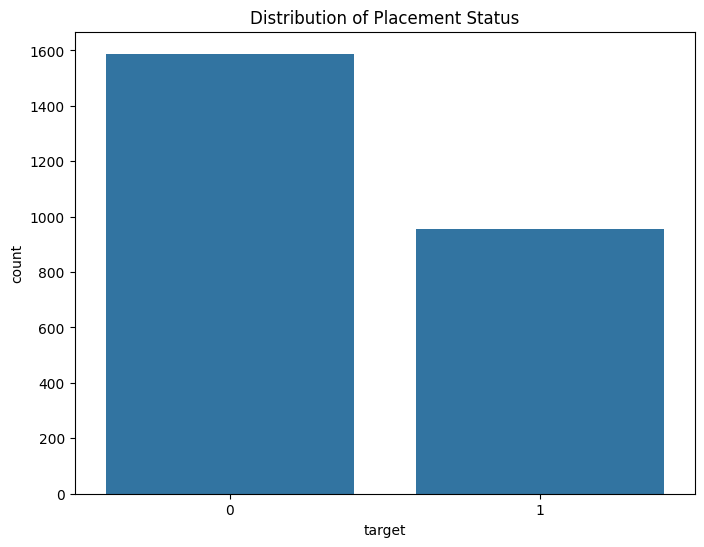

In [42]:
# Visualize the distribution of key variables
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Placement Status')
plt.show()

# **2. Data Cleaning and Preprocessing:**

In [43]:
# Check for missing values
df.isnull().sum()

id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
target                           0
dtype: int64

In [44]:
# Mapping categories
education_mapping = {
    "Bachelor's Degree": "Undergraduate",
    "Master's Degree": "Graduate",
    "Some College, No Degree": "Undergraduate",
    "Doctorate or Professional Degree": "Postgraduate",
    "High School Graduate": "Diploma",
    "Some High School": "Diploma",
    "GED or equivalent": "Diploma"
}

# Replace values in the 'highest_level_of_education' column
df['highest_level_of_education'] = df['highest_level_of_education'].replace(education_mapping)

# Verify the changes
print(df['highest_level_of_education'].value_counts())

Undergraduate    1496
Graduate          810
Postgraduate      135
Diploma            45
Name: highest_level_of_education, dtype: int64


In [45]:
print(df.columns)

Index(['id', 'pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race', 'target'],
      dtype='object')


In [46]:
# Fill missing values for categorical columns with the mode
df['cohort_tag'].fillna(df['cohort_tag'].mode()[0], inplace=True)
df['employment_status '].fillna(df['employment_status '].mode()[0], inplace=True)
df['highest_level_of_education'].fillna(df['highest_level_of_education'].mode()[0], inplace=True)
df['length_of_job_search'].fillna(df['length_of_job_search'].mode()[0], inplace=True)
df['biggest_challenge_in_search'].fillna(df['biggest_challenge_in_search'].mode()[0], inplace=True)
df['professional_experience'].fillna(df['professional_experience'].mode()[0], inplace=True)
df['work_authorization_status'].fillna(df['work_authorization_status'].mode()[0], inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['race'].fillna(df['race'].mode()[0], inplace=True)

# Fill missing values for numerical columns with the mean or median
df['program_duration_days'].fillna(df['program_duration_days'].median(), inplace=True)
df['number_of_interviews'].fillna(df['number_of_interviews'].median(), inplace=True)


In [47]:
# Check for missing values
df.isnull().sum()

id                             0
pathrise_status                0
primary_track                  0
cohort_tag                     0
program_duration_days          0
placed                         0
employment_status              0
highest_level_of_education     0
length_of_job_search           0
biggest_challenge_in_search    0
professional_experience        0
work_authorization_status      0
number_of_interviews           0
number_of_applications         0
gender                         0
race                           0
target                         0
dtype: int64

In [49]:
# Mapping categories
category_mapping = {
    'Hearing back on my applications': 'Application Process',
    'Getting past final round interviews': 'Interview Process',
    'Technical interviewing': 'Interview Process',
    'Lack of relevant experience': 'Experience Gap',
    'Getting past mid-stage interviews': 'Interview Process',
    'Figuring out which jobs to apply for': 'Job Selection',
    'Getting past phone screens': 'Interview Process',
    'Behavioral interviewing': 'Interview Process',
    'Resume gap': 'Experience Gap',
    'Technical skills': 'Skill Gap'
}

# Create broader categories
df['biggest_challenge_in_search'] = df['biggest_challenge_in_search'].replace(category_mapping)



In [58]:
df['biggest_challenge_in_search'].value_counts()

Interview Process      1032
Application Process    1026
Experience Gap          264
Job Selection           186
Skill Gap                36
Name: biggest_challenge_in_search, dtype: int64

In [59]:
df

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,target
0,1,0,SWE,OCT19A,112.0,0,Unemployed,Undergraduate,3-5 months,Application Process,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American,0
1,2,0,PSO,JAN20A,112.0,0,Unemployed,Undergraduate,3-5 months,Interview Process,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American,0
2,3,0,Design,AUG19B,0.0,0,Employed Part-Time,Graduate,Less than one month,Job Selection,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American,0
3,4,0,PSO,AUG19B,0.0,0,Contractor,Undergraduate,Less than one month,Interview Process,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify,0
4,5,1,SWE,AUG19A,89.0,1,Unemployed,Undergraduate,1-2 months,Application Process,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,0,Design,JUN18A,457.0,0,Contractor,Graduate,6 months to a year,Interview Process,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American,0
2540,2541,0,Data,JAN19B,488.0,0,Student,Graduate,3-5 months,Application Process,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American,0
2541,2542,0,SWE,SEP18C,112.0,0,Contractor,Undergraduate,Less than one month,Interview Process,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American,0
2542,2543,0,SWE,MAY18A,112.0,0,Student,Graduate,Less than one month,Interview Process,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify,0


In [61]:
df.dtypes

id                               int64
pathrise_status                  int64
primary_track                   object
cohort_tag                      object
program_duration_days          float64
placed                           int64
employment_status               object
highest_level_of_education      object
length_of_job_search            object
biggest_challenge_in_search     object
professional_experience         object
work_authorization_status       object
number_of_interviews           float64
number_of_applications           int64
gender                          object
race                            object
target                           int64
dtype: object

In [63]:

# Select categorical columns for one-hot encoding
nominal_columns = ['primary_track', 'cohort_tag', 'employment_status ', 'highest_level_of_education',
                   'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience',
                   'work_authorization_status', 'gender', 'race']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=nominal_columns, drop_first=True)


In [64]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'program_duration_days' and 'number_of_interviews' are numerical columns to be normalized
numerical_columns = ['program_duration_days', 'number_of_interviews']

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [65]:
df

,id,pathrise_status,program_duration_days,placed,number_of_interviews,number_of_applications,target,primary_track_Design,primary_track_Marketing,primary_track_PSO,...,gender_Male,gender_Non-Binary,race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,1,0,0.204380,0,0.10,900,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,2,0,0.204380,0,0.30,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,3,0,0.000000,0,0.00,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
3,4,0,0.000000,0,0.25,25,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
4,5,1,0.162409,1,0.50,100,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,0,0.833942,0,0.20,15,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2540,2541,0,0.890511,0,0.05,7,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2541,2542,0,0.204380,0,0.05,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2542,2543,0,0.204380,0,0.10,10,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Task 1: Predicting placement (binary classification)
features_task1 = df.drop('placed', axis=1)
target_task1 = df['placed']
X_train_task1, X_test_task1, y_train_task1, y_test_task1 = train_test_split(features_task1, target_task1, test_size=0.2, random_state=42, stratify=target_task1)

# Task 2: Predicting duration until placement (regression)
features_task2 = df.drop('program_duration_days', axis=1)
target_task2 = df['program_duration_days']
X_train_task2, X_test_task2, y_train_task2, y_test_task2 = train_test_split(features_task2, target_task2, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets for each task
print("Task 1:")
print("X_train_task1 shape:", X_train_task1.shape)
print("X_test_task1 shape:", X_test_task1.shape)
print("y_train_task1 shape:", y_train_task1.shape)
print("y_test_task1 shape:", y_test_task1.shape)

print("Task 2:")
print("X_train_task2 shape:", X_train_task2.shape)
print("X_test_task2 shape:", X_test_task2.shape)
print("y_train_task2 shape:", y_train_task2.shape)
print("y_test_task2 shape:", y_test_task2.shape)



Task 1:
X_train_task1 shape: (2035, 94)
X_test_task1 shape: (509, 94)
y_train_task1 shape: (2035,)
y_test_task1 shape: (509,)
Task 2:
X_train_task2 shape: (2035, 94)
X_test_task2 shape: (509, 94)
y_train_task2 shape: (2035,)
y_test_task2 shape: (509,)


# **3. Exploratory Data Analysis (EDA):**

# **4. Feature Engineering:**

# **5. Split Data into Training and Testing Sets:**

# **6. Model Selection:**

Given that the task involves predicting whether a fellow will be placed and estimating the time to placement, you might need two models:
Classification Model: To predict placement (e.g., logistic regression, decision tree, random forest).
Regression Model: To predict the time to placement (e.g., linear regression, decision tree regressor).

# **7. Model Training:**

# **8. Model Evaluation:**

Evaluate the models on the testing dataset using appropriate metrics.
For the classification model, consider metrics like accuracy, precision, recall, and F1-score.
For the regression model, consider metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).


# **9. Interpretation of Results:**

# **10. Recommendations:**

# **11. Documentation and Communication:**

# **12. Iterate**